In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#from tqdm import tqdm_notebook
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
#functii
def plot_train_test(data_train: pd.DataFrame, data_test:pd.DataFrame, actual:str, predicted:str):
    plt.figure(figsize=(12,6))
    # Plot y1 and y2 from df1 with specified colors
    plt.plot(data_train.index[1:], data_train[actual][1:], color='blue', label=actual)
    plt.plot(data_train.index[1:], data_train[predicted][1:], color='orange', label=f'{predicted} in sample')

    # Plot y1 from df2 with specified color
    plt.plot(data_test.index, test[actual], color='blue', label='')

    # Plot y2 from df2 with specified color and label
    plt.plot(data_test.index, test[predicted], color='red', label=f'{predicted} out of sample')

    # Set the title and labels
    plt.title('In sample vs out of sample prediction')
    plt.xlabel('Date')
    plt.ylabel('Values')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


def train_and_plot(data_train:pd.DataFrame,data_test:pd.DataFrame,p:int, i:int,q:int, actual:str,length_test:int):
    model = ARIMA(data_train[actual], order=(p, i, q)).fit()
    print((model.summary()))
    label = f"ARIMA_{p}_{i}_{q}"
    train[label] = model.fittedvalues
    test[label] = model.forecast(length_test+1)
    plot_train_test(data_train=data_train, data_test=data_test, actual=actual,predicted=label)
    


    

In [161]:
df = pd.read_csv("../data/inflatie_ro.csv")
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

In [162]:
#plot
#check stationarity (discuss about it)
#check ACF PACF
#AR
#MA
#ARIMA
#compare


Text(0.5, 1.0, 'Inflatia in Romania')

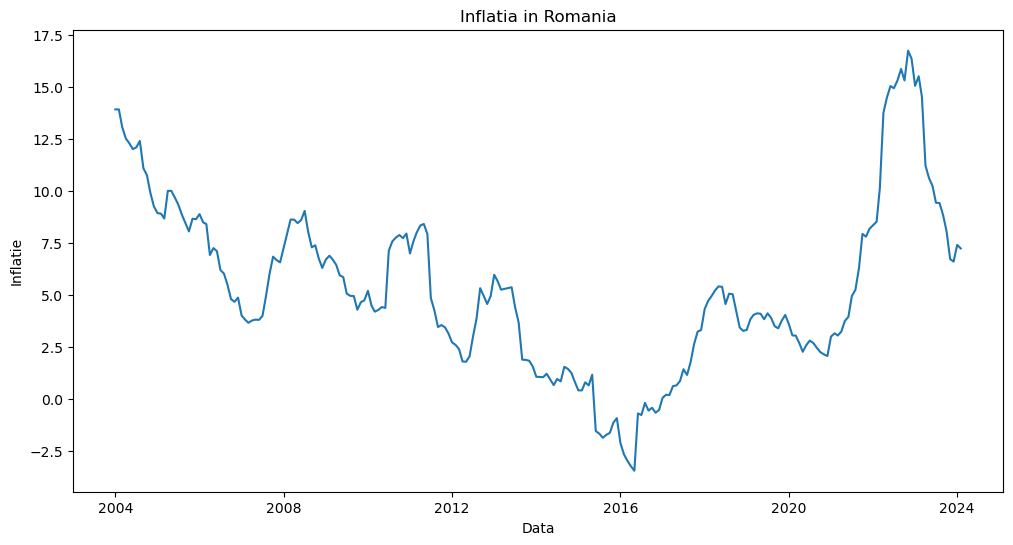

In [163]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Data',y='Inflatie')
g.set_title('Inflatia in Romania')


### Stationaritate

__Discutie__

Conditii: 
* Medie constatna
* Varianta constanta
* Nu e sezonalitate

In [164]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Inflatie'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.819432
p-value: 0.370858


In [165]:
#o facem stationara
from statsmodels.tsa.stattools import adfuller
df['Inflatie_diff_1'] = df['Inflatie'].diff()
df.dropna(inplace=True)
result = adfuller(df['Inflatie_diff_1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.530571
p-value: 0.000173


Text(0.5, 1.0, 'Difference 1')

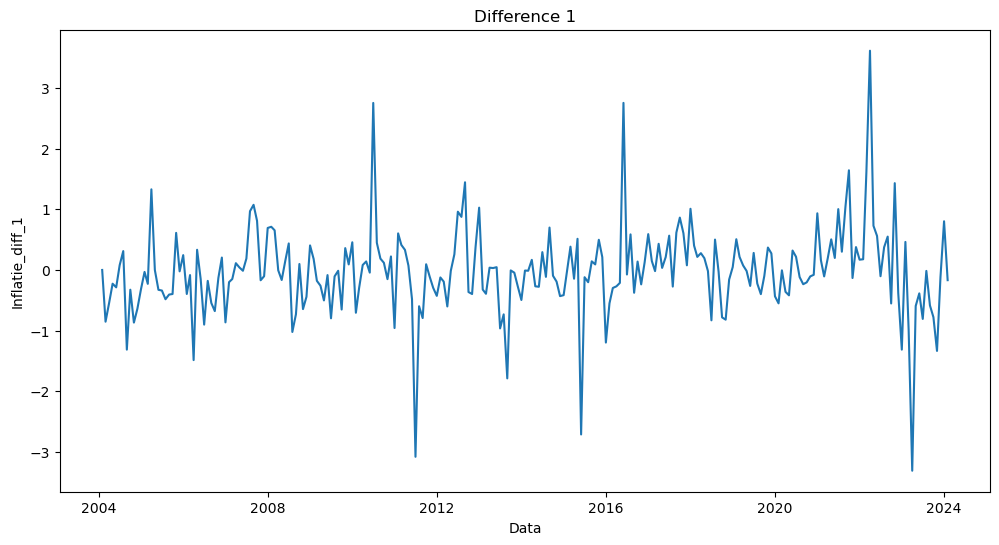

In [166]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Data',y='Inflatie_diff_1')
g.set_title('Difference 1') 


In [167]:
length_test = 12
train = df[0:-length_test].copy()
test = df[-length_test:].copy()


### ACF PACF

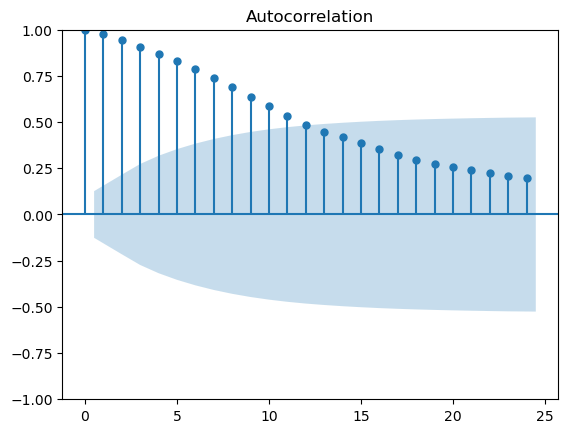

<Figure size 1200x600 with 0 Axes>

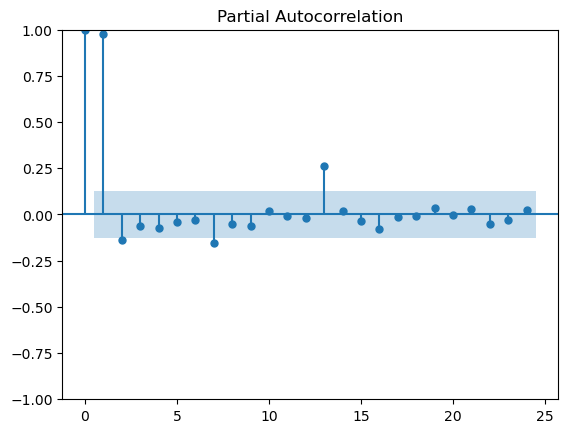

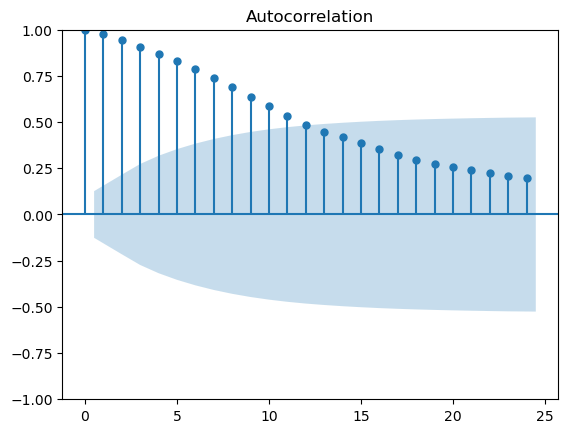

In [214]:
plot_pacf(df['Inflatie'])
plot_acf(df['Inflatie'])

Lag 1 contribuie cel mai mult la Yt, mai sunt si alte lag-uri, de exemplu lag 12

### AR

Yt = beta0 + beta1 yt-1 + beta2 yt-2 + .. + betap *yt-p

In [ ]:
#define experimentn
p = 1
i = 1
q = 0

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)

In [209]:
p = 1 #for AR
i_diff = 1 #first diff
q = 0 #for MA
model_AR = ARIMA(train['Inflatie'], order=(p, i_diff, q)).fit()
print((model_AR.summary()))

                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -232.243
Date:                Mon, 15 Apr 2024   AIC                            468.486
Time:                        18:48:24   BIC                            475.345
Sample:                    02-01-2004   HQIC                           471.254
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2382      0.063      3.779      0.000       0.115       0.362
sigma2         0.4489      0.022     20.592      0.000       0.406       0.492
Ljung-Box (L1) (Q):                   0.13   Jarque-

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Ljung-Box arata autocorelarea. P = 0.71, >0.05 => nu este autocorelare

In [210]:
label_AR = f"AR_{p}"
train[label_AR] = model_AR.fittedvalues
test[label_AR] = model_AR.forecast(length_test+1)



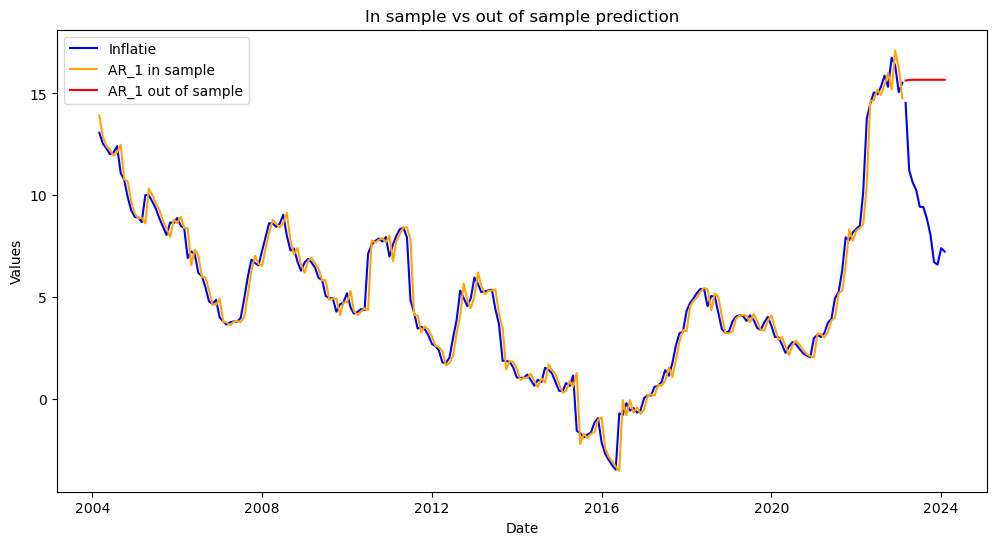

In [211]:
plot_train_test(data_train=train, data_test=test, actual='Inflatie',predicted=label_AR)

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -230.984
Date:                Mon, 15 Apr 2024   AIC                            467.967
Time:                        18:53:46   BIC                            478.255
Sample:                    02-01-2004   HQIC                           472.118
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6811      0.216      3.149      0.002       0.257       1.105
ma.L1         -0.4847      0.255     -1.902      0.057      -0.984       0.015
sigma2         0.4439      0.021     20.699      0.0

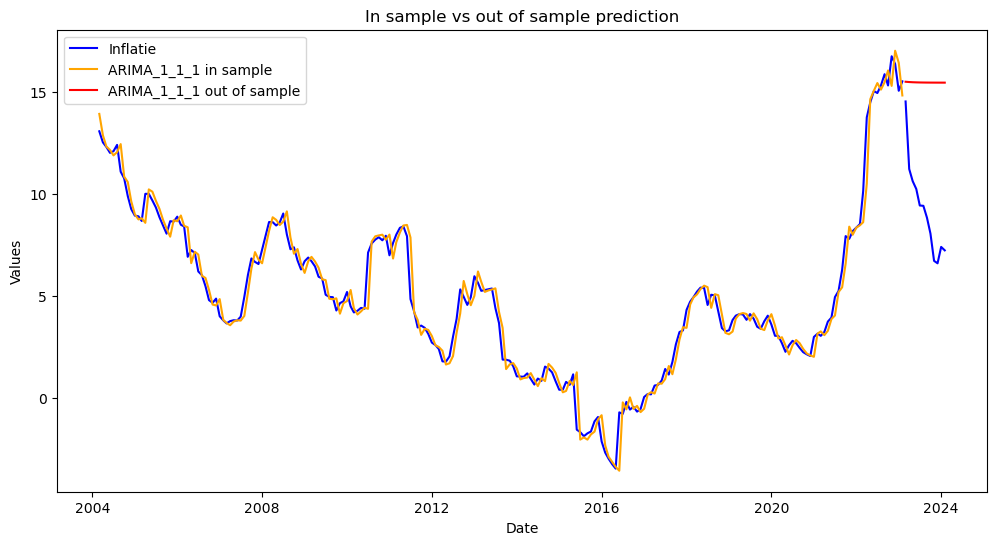

In [213]:
train_and_plot(data_train=train,data_test=test,p=1,i=1,q=1,actual='Inflatie',length_test=length_test)

### MA

Yt = u + et + beta1*et-1 + beta2*et-2 + ... + beta_q*et-q

In [183]:
p = 0 #for AR
i_diff = 1 #first diff
q = 12 #for MA
model_MA1 = ARIMA(train['Inflatie'], order=(p, i_diff, q)).fit()
print((model_MA1.summary()))

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                ARIMA(0, 1, 12)   Log Likelihood                -178.158
Date:                Mon, 15 Apr 2024   AIC                            382.317
Time:                        18:24:24   BIC                            426.898
Sample:                    02-01-2004   HQIC                           400.304
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2004      0.206      0.972      0.331      -0.204       0.604
ma.L2          0.1638      0.260      0.630      0.529      -0.346       0.674
ma.L3          0.1817      0.116      1.570      0.1

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [184]:
train['MA1'] = model_MA1.fittedvalues
test['MA1'] = model_MA1.forecast(length_test+1)
full_df = pd.concat([train,test],axis=0)

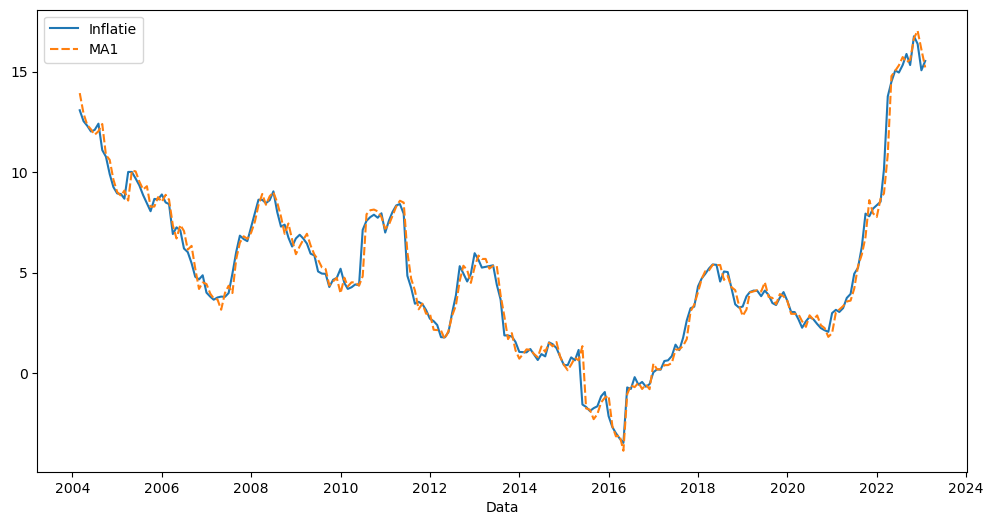

In [185]:
plt.figure(figsize=(12,6))
train_plot = sns.lineplot(data=train[['Inflatie','MA1']][1:])
plt.show()

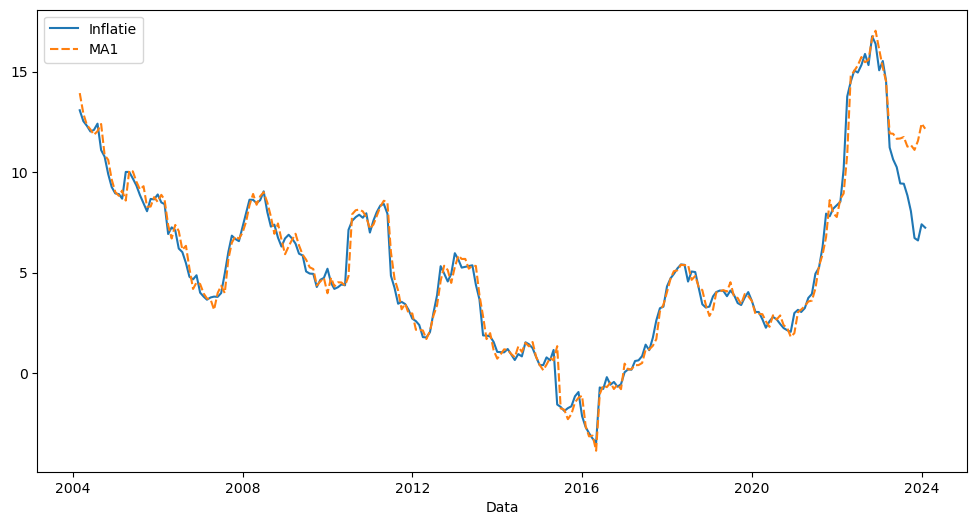

In [189]:
plt.figure(figsize=(12,6))
full_plot = sns.lineplot(data=full_df[['Inflatie','MA1']][1:])
plt.show()

TypeError: _AxesBase.add_line() got an unexpected keyword argument 'data'

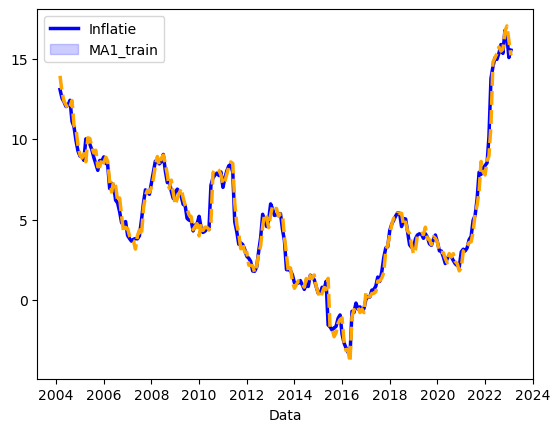

In [201]:
# Plot y1 and y2 from df1 using seaborn lineplot
g = sns.lineplot(data=train[['Inflatie','MA1']][1:], palette=['blue', 'orange'], linewidth=2.5)
g.legend(['Inflatie','MA1_train'])

# Plot y1 and y2 from df2 using seaborn lineplot with different color for y2
g.add_line(data=test['MA1'], palette=['blue', 'red'], linewidth=2.5)

# Set the title and labels
plt.title('Line Plot of y1 and y2')
plt.xlabel('Date')
plt.ylabel('Values')

# Add legend
#plt.legend()

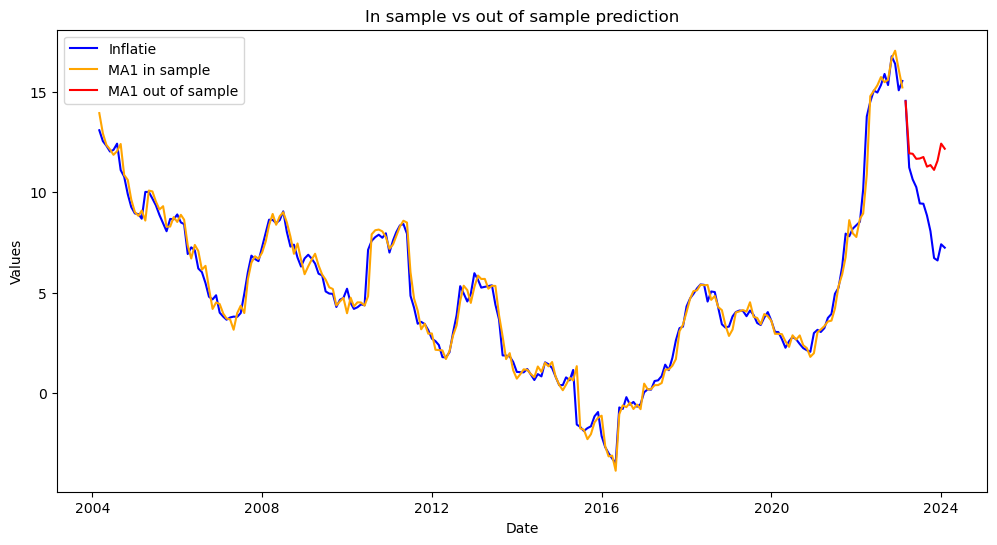

In [207]:
plot_train_test(data_train=train, data_test=test, actual='Inflatie', predicted='MA1')

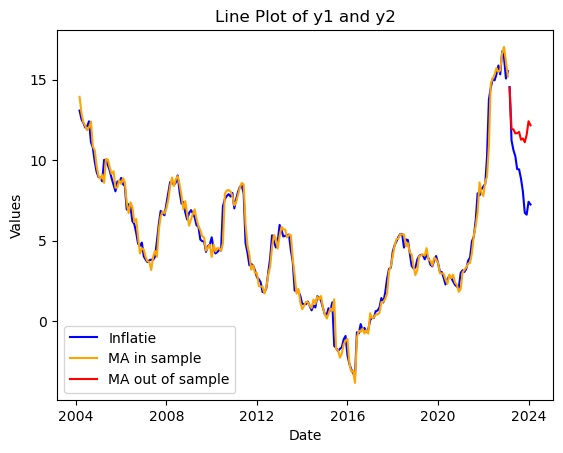

In [205]:
# Plot y1 and y2 from df1 with specified colors
plt.plot(train.index[1:], train['Inflatie'][1:], color='blue', label='Inflatie')
plt.plot(train.index[1:], train['MA1'][1:], color='orange', label='MA in sample')

# Plot y1 from df2 with specified color
plt.plot(test.index, test['Inflatie'], color='blue', label='')

# Plot y2 from df2 with specified color and label
plt.plot(test.index, test['MA1'], color='red', label='MA out of sample')

# Set the title and labels
plt.title('Line Plot of y1 and y2')
plt.xlabel('Date')
plt.ylabel('Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

ARIMA

In [178]:
p = 12 #for AR
i_diff = 1 #first diff
q = 12 #for MA
model_ARIMA_111 = ARIMA(train['Inflatie'], order=(p, i_diff, q)).fit()
print((model_ARIMA_111.summary()))

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:               ARIMA(12, 1, 12)   Log Likelihood                -172.529
Date:                Mon, 15 Apr 2024   AIC                            395.059
Time:                        18:22:51   BIC                            480.792
Sample:                    02-01-2004   HQIC                           429.650
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1951      0.151      1.292      0.196      -0.101       0.491
ar.L2          0.0378      0.148      0.255      0.798      -0.252       0.328
ar.L3          0.0330      0.137      0.241      0.8

In [179]:
train['ARIMA_111'] = model_ARIMA_111.fittedvalues
test['ARIMA_111'] = model_ARIMA_111.forecast(length_test+1)
full_df = pd.concat([train,test],axis=0)

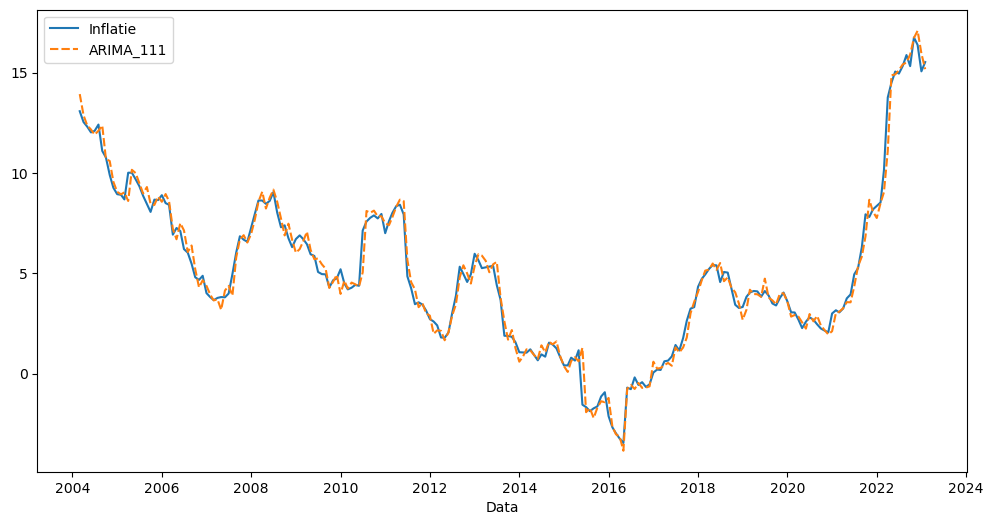

In [180]:
plt.figure(figsize=(12,6))
train_plot = sns.lineplot(data=train[['Inflatie','ARIMA_111']][1:])
plt.show()

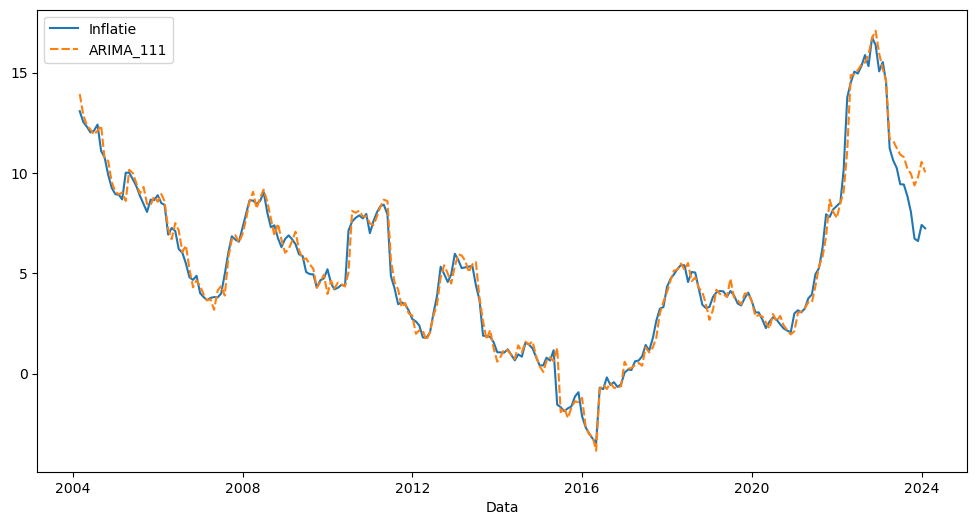

In [181]:
plt.figure(figsize=(12,6))
full_plot = sns.lineplot(data=full_df[['Inflatie','ARIMA_111']][1:])
plt.show()

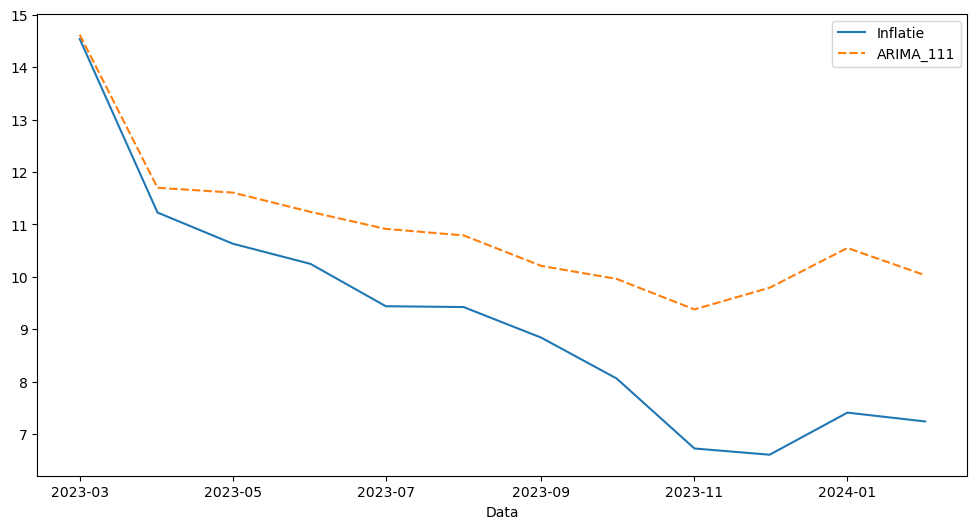

In [182]:
plt.figure(figsize=(12,6))
full_plot = sns.lineplot(data=test[['Inflatie','ARIMA_111']][:])
plt.show()